# Pandas
- Data Analysis Library
- 核心 DataFrame

# Pandas简介
- python数据分析library
- 基于numpy（对ndarray的操作）
- 有一种用python做Excel/SQL/R的感觉
- 为什么要学习pandas
- pandas和机器学习的关系，数据预处理，feature engineering
- 适合自学的资料（pandas官网User Guide）课后自学tutorial和API

# 目录
- Series
- DataFrame
- 文件读写
- index
- Groupby和Aggregate
- 表格的匹配与拼接
- movie ratings项目
- bikes项目
- 股票走势图项目

## Series
- 任意一个一维数组或者是具有key-value形式的数据都可以转换为一个Series
- 是一个一维list，也是一个dictionary

### 构造和初始化Series

In [1]:
import pandas as pd
import numpy as np

#### Series是一个一维的数据结构，初始化Series

In [2]:
s = pd.Series([7, "Beijing", 2.17, -1234, "pandas"])
s

0          7
1    Beijing
2       2.17
3      -1234
4     pandas
dtype: object

In [3]:
type(s)

pandas.core.series.Series

In [4]:
s = pd.Series([1,2,3,4])
s

0    1
1    2
2    3
3    4
dtype: int64

#### pandas会默认用0到n-1作为Series的index，但是也可以自己指定index，可理解为dict里的key

In [5]:
list("ABCDE")

['A', 'B', 'C', 'D', 'E']

In [6]:
s = pd.Series([7, "Beijing", 2.17, -1234, "pandas"],index=list("ABCDE"))
s

A          7
B    Beijing
C       2.17
D      -1234
E     pandas
dtype: object

#### 还可以用一个dictionary来构造一个Series，因为Series本身就是key value pairs

In [7]:
cities = {'Beijing': 55000, 'Shanghai': 60000, 'Shenzhen': 50000, 
         'Hangzhou': 30000, "Guangzhou": 20000, "Suzhou": None}
apts = pd.Series(cities)
apts

Beijing      55000.0
Shanghai     60000.0
Shenzhen     50000.0
Hangzhou     30000.0
Guangzhou    20000.0
Suzhou           NaN
dtype: float64

In [8]:
type(apts)

pandas.core.series.Series

#### numpy ndarray构建一个Series

In [9]:
s = pd.Series(np.random.randn(5), index=list("abcde"))
s

a   -0.360222
b    1.280519
c    1.181799
d   -0.995661
e    1.122906
dtype: float64

### 选择数据

#### 可以像对待一个list一样对待一个Series

In [10]:
apts

Beijing      55000.0
Shanghai     60000.0
Shenzhen     50000.0
Hangzhou     30000.0
Guangzhou    20000.0
Suzhou           NaN
dtype: float64

In [11]:
apts[2]

50000.0

In [12]:
apts['Beijing']

55000.0

In [13]:
apts[2:]

Shenzhen     50000.0
Hangzhou     30000.0
Guangzhou    20000.0
Suzhou           NaN
dtype: float64

In [14]:
apts[::-1]

Suzhou           NaN
Guangzhou    20000.0
Hangzhou     30000.0
Shenzhen     50000.0
Shanghai     60000.0
Beijing      55000.0
dtype: float64

In [15]:
apts[[4,2]]

Guangzhou    20000.0
Shenzhen     50000.0
dtype: float64

#### 为什么下面这样会拿到两个NaN？(NaN表示not a number)

In [16]:
apts[1:]

Shanghai     60000.0
Shenzhen     50000.0
Hangzhou     30000.0
Guangzhou    20000.0
Suzhou           NaN
dtype: float64

In [17]:
apts[:-1]

Beijing      55000.0
Shanghai     60000.0
Shenzhen     50000.0
Hangzhou     30000.0
Guangzhou    20000.0
dtype: float64

In [18]:
apts[1:]+apts[:-1]

Beijing           NaN
Guangzhou     40000.0
Hangzhou      60000.0
Shanghai     120000.0
Shenzhen     100000.0
Suzhou            NaN
dtype: float64

#### Series就像一个dict，前面定义的index就是用来选择数据的

In [19]:
apts["Hangzhou"] #若其中key不存在就会报错

30000.0

In [20]:
apts[["Hangzhou","Beijing","Shenzhen"]]

Hangzhou    30000.0
Beijing     55000.0
Shenzhen    50000.0
dtype: float64

In [21]:
"Hangzhou" in apts

True

In [22]:
"aaaaa" in apts

False

#### 比较安全的用key读取value的方法如下(与python语法一样)

In [23]:
apts.get("aaaaa",0)

0

#### boolean indexing，与numpy类似

In [24]:
apts < 50000

Beijing      False
Shanghai     False
Shenzhen     False
Hangzhou      True
Guangzhou     True
Suzhou       False
dtype: bool

In [25]:
apts[apts < 50000]

Hangzhou     30000.0
Guangzhou    20000.0
dtype: float64

In [26]:
apts.median() #中位数

50000.0

In [27]:
apts[apts > apts.median()]

Beijing     55000.0
Shanghai    60000.0
dtype: float64

### Series元素赋值

#### Series的元素可以被赋值，boolean indexing在赋值时也可以用

In [28]:
apts["Shenzhen"]

50000.0

In [29]:
apts["Shenzhen"] = 55000

In [30]:
apts

Beijing      55000.0
Shanghai     60000.0
Shenzhen     55000.0
Hangzhou     30000.0
Guangzhou    20000.0
Suzhou           NaN
dtype: float64

In [31]:
apts[apts < 50000]

Hangzhou     30000.0
Guangzhou    20000.0
dtype: float64

In [32]:
apts[apts < 50000] = 40000

In [33]:
apts

Beijing      55000.0
Shanghai     60000.0
Shenzhen     55000.0
Hangzhou     40000.0
Guangzhou    40000.0
Suzhou           NaN
dtype: float64

### 数学运算

#### 基本数学运算

In [34]:
apts / 2

Beijing      27500.0
Shanghai     30000.0
Shenzhen     27500.0
Hangzhou     20000.0
Guangzhou    20000.0
Suzhou           NaN
dtype: float64

In [35]:
apts * 3

Beijing      165000.0
Shanghai     180000.0
Shenzhen     165000.0
Hangzhou     120000.0
Guangzhou    120000.0
Suzhou            NaN
dtype: float64

In [36]:
apts - 60000

Beijing      -5000.0
Shanghai         0.0
Shenzhen     -5000.0
Hangzhou    -20000.0
Guangzhou   -20000.0
Suzhou           NaN
dtype: float64

In [37]:
apts ** 2

Beijing      3.025000e+09
Shanghai     3.600000e+09
Shenzhen     3.025000e+09
Hangzhou     1.600000e+09
Guangzhou    1.600000e+09
Suzhou                NaN
dtype: float64

#### numpy里面的数学函数也可以使用，所以说pandas时架构在numpy上的一个library

In [38]:
np.sqrt(apts) 

Beijing      234.520788
Shanghai     244.948974
Shenzhen     234.520788
Hangzhou     200.000000
Guangzhou    200.000000
Suzhou              NaN
dtype: float64

#### 定义一个新的Series做加法

In [39]:
cars = pd.Series({'Beijing': 300000, 'Shanghai': 400000, 'Shenzhen': 300000, 
         'Hangzhou': 200000, "Guangzhou": 250000, "Chongqing": 150000})
cars

Beijing      300000
Shanghai     400000
Shenzhen     300000
Hangzhou     200000
Guangzhou    250000
Chongqing    150000
dtype: int64

In [40]:
cars + apts *100

Beijing      5800000.0
Chongqing          NaN
Guangzhou    4250000.0
Hangzhou     4200000.0
Shanghai     6400000.0
Shenzhen     5800000.0
Suzhou             NaN
dtype: float64

## DataFrame
- 一个DataFrame就是一张表格，Series表示的是一维数组，那么DataFrame表示的就是二维数组，可以类比为一张Excel的spreadsheet，也可以当作是一组Series的集合

### 创建一个DataFrame

#### dataframe可以由一个dict构造得到

In [41]:
data = {"city": ['Beijing' , 'Shanghai', 'Shenzhen', 
         'Hangzhou', "Guangzhou", "Chongqing"],
        "year": [2016, 2017, 2016, 2017, 2018, 2020],
        "population": [100, 200, 300, 400, 500, 600]}
data

{'city': ['Beijing',
  'Shanghai',
  'Shenzhen',
  'Hangzhou',
  'Guangzhou',
  'Chongqing'],
 'year': [2016, 2017, 2016, 2017, 2018, 2020],
 'population': [100, 200, 300, 400, 500, 600]}

In [42]:
pd.DataFrame(data) # 可以看出dataframe是把column当主轴的一种数据结构

,city,year,population
0,Beijing,2016,100
1,Shanghai,2017,200
2,Shenzhen,2016,300
3,Hangzhou,2017,400
4,Guangzhou,2018,500
5,Chongqing,2020,600


#### column的名字和顺序可以指定,index也可以指定

In [43]:
pd.DataFrame(data, columns=["year", "city", "population"])
# dict的value是list，默认给list index：0到n-1，数据就按index对应，表现为按list顺序对应

,year,city,population
0,2016,Beijing,100
1,2017,Shanghai,200
2,2016,Shenzhen,300
3,2017,Hangzhou,400
4,2018,Guangzhou,500
5,2020,Chongqing,600


In [44]:
pd.DataFrame(data, columns=["year", "city", "population"], 
             index=["one", "two", "three", "four", "five", "six"])

,year,city,population
one,2016,Beijing,100
two,2017,Shanghai,200
three,2016,Shenzhen,300
four,2017,Hangzhou,400
five,2018,Guangzhou,500
six,2020,Chongqing,600


#### 也可以从几个Series构建一个Dataframe

In [45]:
apts

Beijing      55000.0
Shanghai     60000.0
Shenzhen     55000.0
Hangzhou     40000.0
Guangzhou    40000.0
Suzhou           NaN
dtype: float64

In [46]:
cars

Beijing      300000
Shanghai     400000
Shenzhen     300000
Hangzhou     200000
Guangzhou    250000
Chongqing    150000
dtype: int64

In [47]:
df = pd.DataFrame({"apts":apts, "cars":cars})
df
# 仍然是dict，value仍是list，但这个list自带index，所以按index来对应

,apts,cars
Beijing,55000.0,300000.0
Chongqing,NaN,150000.0
Guangzhou,40000.0,250000.0
Hangzhou,40000.0,200000.0
Shanghai,60000.0,400000.0
Shenzhen,55000.0,300000.0
Suzhou,NaN,NaN


#### 上面是用dictionary of lists来构建dataframe，当然也可以用list of dicts来构建

In [48]:
data1 = [{"apts": 80000, "cars": 500000}, {"apts": 60000, "cars": 400000}]
pd.DataFrame(data1)
# keys决定了columns，而list赋予了list[i]位置这个dict里面value元素index：i

,apts,cars
0,80000,500000
1,60000,400000


In [49]:
pd.DataFrame(data1, index=["Hong Kong", "Shanghai"])

,apts,cars
Hong Kong,80000,500000
Shanghai,60000,400000


In [50]:
df

,apts,cars
Beijing,55000.0,300000.0
Chongqing,NaN,150000.0
Guangzhou,40000.0,250000.0
Hangzhou,40000.0,200000.0
Shanghai,60000.0,400000.0
Shenzhen,55000.0,300000.0
Suzhou,NaN,NaN


#### 从dataframe中拿出column以及可以从已有的column增添新的column

In [51]:
df["apts"]

Beijing      55000.0
Chongqing        NaN
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     55000.0
Suzhou           NaN
Name: apts, dtype: float64

In [52]:
df.apts

Beijing      55000.0
Chongqing        NaN
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     55000.0
Suzhou           NaN
Name: apts, dtype: float64

In [53]:
type(df.apts)

pandas.core.series.Series

In [54]:
df["total_cost"] = df["apts"]*100 + df["cars"]
df
# 从已知列 再加一个列

,apts,cars,total_cost
Beijing,55000.0,300000.0,5800000.0
Chongqing,NaN,150000.0,NaN
Guangzhou,40000.0,250000.0,4250000.0
Hangzhou,40000.0,200000.0,4200000.0
Shanghai,60000.0,400000.0,6400000.0
Shenzhen,55000.0,300000.0,5800000.0
Suzhou,NaN,NaN,NaN


In [55]:
# df["Hangzhou"] # 错误代码，没有Hangzhou列

#### 用loc可以拿到dataframe的行，以及指定的行和列

In [56]:
df.loc["Hangzhou"]

apts            40000.0
cars           200000.0
total_cost    4200000.0
Name: Hangzhou, dtype: float64

In [57]:
df.loc["Hangzhou", "cars"]

200000.0

#### 可以用iloc来拿到行和列，类似于当作ndarray来处理

In [58]:
df.iloc[1:4, 1:3]

,cars,total_cost
Chongqing,150000.0,NaN
Guangzhou,250000.0,4250000.0
Hangzhou,200000.0,4200000.0


In [59]:
data

{'city': ['Beijing',
  'Shanghai',
  'Shenzhen',
  'Hangzhou',
  'Guangzhou',
  'Chongqing'],
 'year': [2016, 2017, 2016, 2017, 2018, 2020],
 'population': [100, 200, 300, 400, 500, 600]}

In [60]:
frame = pd.DataFrame(data, columns=["year", "city", "population"], 
             index=["one", "two", "three", "four", "five", "six"])
frame

,year,city,population
one,2016,Beijing,100
two,2017,Shanghai,200
three,2016,Shenzhen,300
four,2017,Hangzhou,400
five,2018,Guangzhou,500
six,2020,Chongqing,600


### DataFrame的元素赋值

#### 取出指定位置的元素（当然也可以修改）

In [61]:
frame.at["one", "population"]

100

In [62]:
frame.at["one", "population"] = 1000

In [63]:
frame

,year,city,population
one,2016,Beijing,1000
two,2017,Shanghai,200
three,2016,Shenzhen,300
four,2017,Hangzhou,400
five,2018,Guangzhou,500
six,2020,Chongqing,600


In [64]:
frame.loc["one", "population"]

1000

#### 也可以给一整列/行赋值

In [65]:
frame["debt"] = 222
frame

,year,city,population,debt
one,2016,Beijing,1000,222
two,2017,Shanghai,200,222
three,2016,Shenzhen,300,222
four,2017,Hangzhou,400,222
five,2018,Guangzhou,500,222
six,2020,Chongqing,600,222


In [66]:
frame.loc["six"] = 0
frame

,year,city,population,debt
one,2016,Beijing,1000,222
two,2017,Shanghai,200,222
three,2016,Shenzhen,300,222
four,2017,Hangzhou,400,222
five,2018,Guangzhou,500,222
six,0,0,0,0


In [67]:
frame.loc[:, "debt"] = 3
frame

,year,city,population,debt
one,2016,Beijing,1000,3
two,2017,Shanghai,200,3
three,2016,Shenzhen,300,3
four,2017,Hangzhou,400,3
five,2018,Guangzhou,500,3
six,0,0,0,3


In [68]:
frame["debt"] = 4
frame

,year,city,population,debt
one,2016,Beijing,1000,4
two,2017,Shanghai,200,4
three,2016,Shenzhen,300,4
four,2017,Hangzhou,400,4
five,2018,Guangzhou,500,4
six,0,0,0,4


In [69]:
frame.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

In [70]:
frame.columns

Index(['year', 'city', 'population', 'debt'], dtype='object')

In [71]:
frame.debt = np.arange(6)*100
frame

,year,city,population,debt
one,2016,Beijing,1000,0
two,2017,Shanghai,200,100
three,2016,Shenzhen,300,200
four,2017,Hangzhou,400,300
five,2018,Guangzhou,500,400
six,0,0,0,500


#### 还可以用Series来指定需要修改的index以及相对应的value，没有指定的默认为NaN

In [72]:
val = pd.Series([100,200,300], index=["two", "five", "six"])
frame.debt = val
frame

,year,city,population,debt
one,2016,Beijing,1000,NaN
two,2017,Shanghai,200,100.0
three,2016,Shenzhen,300,NaN
four,2017,Hangzhou,400,NaN
five,2018,Guangzhou,500,200.0
six,0,0,0,300.0


#### boolean indexing同样适用

In [73]:
frame.city == "Beijing"

one       True
two      False
three    False
four     False
five     False
six      False
Name: city, dtype: bool

In [74]:
frame["Northern"] = frame.city == "Beijing"
frame

,year,city,population,debt,Northern
one,2016,Beijing,1000,NaN,True
two,2017,Shanghai,200,100.0,False
three,2016,Shenzhen,300,NaN,False
four,2017,Hangzhou,400,NaN,False
five,2018,Guangzhou,500,200.0,False
six,0,0,0,300.0,False


#### dataframe可以转置

In [75]:
frame.T

,one,two,three,four,five,six
year,2016,2017,2016,2017,2018,0
city,Beijing,Shanghai,Shenzhen,Hangzhou,Guangzhou,0
population,1000,200,300,400,500,0
debt,NaN,100,NaN,NaN,200,300
Northern,True,False,False,False,False,False


#### 还可以指定行和列的名字

In [76]:
frame.index.name = "index"
frame.columns.name = "information"
frame

information,year,city,population,debt,Northern
index,,,,,
one,2016,Beijing,1000,NaN,True
two,2017,Shanghai,200,100.0,False
three,2016,Shenzhen,300,NaN,False
four,2017,Hangzhou,400,NaN,False
five,2018,Guangzhou,500,200.0,False
six,0,0,0,300.0,False


#### 可以直接将dataframe中的数据转化为ndarray，从而方便操作

In [77]:
frame.values

array([[2016, 'Beijing', 1000, nan, True],
       [2017, 'Shanghai', 200, 100.0, False],
       [2016, 'Shenzhen', 300, nan, False],
       [2017, 'Hangzhou', 400, nan, False],
       [2018, 'Guangzhou', 500, 200.0, False],
       [0, 0, 0, 300.0, False]], dtype=object)

In [78]:
type(frame.values)

numpy.ndarray

## csv文件的读写

### 数据读取和查看

In [79]:
pokemon = pd.read_csv("pokemon.csv")

In [80]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [81]:
pokemon.head(20) # 查看前20行数据内容

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [82]:
pokemon.describe() # 简要分析数据列的数据信息

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### 数据缺失

In [83]:
pokemon["Type 2"].isnull() # 可以看出Type 2列中数据有缺失

0      False
1      False
2      False
3      False
4       True
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Type 2, Length: 800, dtype: bool

In [84]:
pokemon.loc[pokemon["Type 2"].isnull(), "Type 2"]

4      NaN
5      NaN
9      NaN
10     NaN
11     NaN
      ... 
775    NaN
776    NaN
788    NaN
789    NaN
792    NaN
Name: Type 2, Length: 386, dtype: object

In [85]:
pokemon.loc[pokemon["Type 2"].isnull(), "Type 2"] = pokemon.loc
[pokemon["Type 2"].isnull(), "Type 1"]
pokemon
# 将Type 2 中空缺信息用Type 1 中对应信息填补

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,<pandas.core.indexing._LocIndexer object at 0x...,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [86]:
apts

Beijing      55000.0
Shanghai     60000.0
Shenzhen     55000.0
Hangzhou     40000.0
Guangzhou    40000.0
Suzhou           NaN
dtype: float64

In [87]:
apts.notnull()

Beijing       True
Shanghai      True
Shenzhen      True
Hangzhou      True
Guangzhou     True
Suzhou       False
dtype: bool

In [88]:
apts.isnull()

Beijing      False
Shanghai     False
Shenzhen     False
Hangzhou     False
Guangzhou    False
Suzhou        True
dtype: bool

In [89]:
apts.isnull() == False

Beijing       True
Shanghai      True
Shenzhen      True
Hangzhou      True
Guangzhou     True
Suzhou       False
dtype: bool

### 数据写入文件

In [90]:
df

,apts,cars,total_cost
Beijing,55000.0,300000.0,5800000.0
Chongqing,NaN,150000.0,NaN
Guangzhou,40000.0,250000.0,4250000.0
Hangzhou,40000.0,200000.0,4200000.0
Shanghai,60000.0,400000.0,6400000.0
Shenzhen,55000.0,300000.0,5800000.0
Suzhou,NaN,NaN,NaN


In [91]:
df.to_csv("dataframe sample.csv") # 写成csv格式，默认用逗号分隔

In [92]:
df.to_csv("dataframe sample.tsv", sep="\t") # tsv格式，用tab分隔

## index

### index object

In [93]:
obj = pd.Series(range(3), index=list("abc"))
obj

a    0
b    1
c    2
dtype: int64

In [94]:
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

#### index取出来就像是一个Series，但是重要区别是不能变更

In [95]:
index[1:]

Index(['b', 'c'], dtype='object')

In [96]:
# index[1]=k #报错行

### 针对index进行索引和切片

In [97]:
obj["b"]

1

In [98]:
obj[1] # 默认数字依旧可以使用

1

#### 对Series切片

In [99]:
obj["a":"c"] # 重要区别，右边也是包含的，不同于0：2

a    0
b    1
c    2
dtype: int64

#### 对DataFrame进行indexing与Series基本相同

In [100]:
frame

information,year,city,population,debt,Northern
index,,,,,
one,2016,Beijing,1000,NaN,True
two,2017,Shanghai,200,100.0,False
three,2016,Shenzhen,300,NaN,False
four,2017,Hangzhou,400,NaN,False
five,2018,Guangzhou,500,200.0,False
six,0,0,0,300.0,False


In [101]:
frame[:2]

information,year,city,population,debt,Northern
index,,,,,
one,2016,Beijing,1000,NaN,True
two,2017,Shanghai,200,100.0,False


In [102]:
frame.loc["two":"four", "city":"debt"]

information,city,population,debt
index,,,
two,Shanghai,200,100.0
three,Shenzhen,300,NaN
four,Hangzhou,400,NaN


### reindex

#### 把一个Sereis或者DataFrame按照新的index顺序进行重排

In [103]:
obj = pd.Series(np.random.rand(5), index=["d","b","a","e","c"])
obj

d    0.334444
b    0.916557
a    0.916273
e    0.443394
c    0.206984
dtype: float64

In [104]:
obj2 = obj.reindex(list("abcde")) 
obj2

a    0.916273
b    0.916557
c    0.206984
d    0.334444
e    0.443394
dtype: float64

In [105]:
obj # 说明reindex只是返回一个新的Series，并不改变原本的Series

d    0.334444
b    0.916557
a    0.916273
e    0.443394
c    0.206984
dtype: float64

#### 如果我们reindex的index长度比原来的长，可以指定方法来fill NaN

In [106]:
obj.reindex(list("abcdef"))

a    0.916273
b    0.916557
c    0.206984
d    0.334444
e    0.443394
f         NaN
dtype: float64

In [107]:
obj.reindex(list("abcdef"), fill_value=0)

a    0.916273
b    0.916557
c    0.206984
d    0.334444
e    0.443394
f    0.000000
dtype: float64

In [108]:
obj3=pd.Series(["blue","purple","yellow"], index=[0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [109]:
obj3.reindex(range(6),method="ffill") # forward fill

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [110]:
obj3.reindex(range(6),method="bfill") # backward fill

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

#### 相应的，我们可以用同样的方法对DataFrame进行reindex

In [111]:
frame

information,year,city,population,debt,Northern
index,,,,,
one,2016,Beijing,1000,NaN,True
two,2017,Shanghai,200,100.0,False
three,2016,Shenzhen,300,NaN,False
four,2017,Hangzhou,400,NaN,False
five,2018,Guangzhou,500,200.0,False
six,0,0,0,300.0,False


In [112]:
frame.reindex(columns=["city","year","population","debt"],index=["two","three",3])

information,city,year,population,debt
index,,,,
two,Shanghai,2017.0,200.0,100.0
three,Shenzhen,2016.0,300.0,NaN
3,NaN,NaN,NaN,NaN


In [113]:
# frame.reindex(index=["one","two",3],method="ffill")
# 错误代码，说明frame要用method填充，index必须为单调数列

In [114]:
frame.reindex(index=["one","two",3],fill_value=0) 
#但是可以用fill_value

information,year,city,population,debt,Northern
index,,,,,
one,2016,Beijing,1000,NaN,True
two,2017,Shanghai,200,100.0,False
3,0,0,0,0.0,0


#### 在reindex的同时，我们还可以重新指定columns

#### 如何用drop来删除Series和DataFrame中的index，注意drop的效果不是in place的，也就是说会返回一个object，原来的object并没有被改变

In [115]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [116]:
obj3.drop(2)

0      blue
4    yellow
dtype: object

In [117]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [118]:
obj3.drop([2,4])

0    blue
dtype: object

In [119]:
frame

information,year,city,population,debt,Northern
index,,,,,
one,2016,Beijing,1000,NaN,True
two,2017,Shanghai,200,100.0,False
three,2016,Shenzhen,300,NaN,False
four,2017,Hangzhou,400,NaN,False
five,2018,Guangzhou,500,200.0,False
six,0,0,0,300.0,False


In [120]:
frame.drop(["one","three"])

information,year,city,population,debt,Northern
index,,,,,
two,2017,Shanghai,200,100.0,False
four,2017,Hangzhou,400,NaN,False
five,2018,Guangzhou,500,200.0,False
six,0,0,0,300.0,False


In [121]:
frame.drop(["Northern","debt"],axis=1) 
# 利用axis参数就可以选中行，习惯与numpy相同

information,year,city,population
index,,,
one,2016,Beijing,1000
two,2017,Shanghai,200
three,2016,Shenzhen,300
four,2017,Hangzhou,400
five,2018,Guangzhou,500
six,0,0,0


### 回顾：csv读入股票数据

In [122]:
%matplotlib inline  
# 作用：plot会直接绘制图像，不需要再用plt.show()

In [123]:
google = pd.read_csv("GOOGL.csv")
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [124]:
google = pd.read_csv("GOOGL.csv", index_col=0) 
# 将conlumn 0 作为index
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [125]:
google.index # 类型是object

Index(['2009-05-22', '2009-05-26', '2009-05-27', '2009-05-28', '2009-05-29',
       '2009-06-01', '2009-06-02', '2009-06-03', '2009-06-04', '2009-06-05',
       ...
       '2018-08-16', '2018-08-17', '2018-08-20', '2018-08-21', '2018-08-22',
       '2018-08-23', '2018-08-24', '2018-08-27', '2018-08-28', '2018-08-29'],
      dtype='object', name='Date', length=2335)

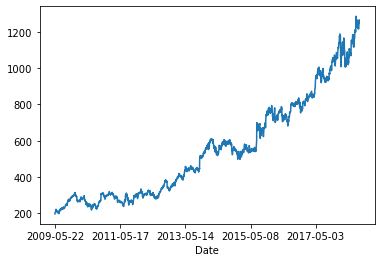

In [126]:
google["Adj Close"].plot()

In [127]:
google = pd.read_csv("GOOGL.csv", index_col=0, parse_dates=[0])
google.index
# 数据类型变成了datetime数据类型，作图更方便，见下

DatetimeIndex(['2009-05-22', '2009-05-26', '2009-05-27', '2009-05-28',
               '2009-05-29', '2009-06-01', '2009-06-02', '2009-06-03',
               '2009-06-04', '2009-06-05',
               ...
               '2018-08-16', '2018-08-17', '2018-08-20', '2018-08-21',
               '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-27',
               '2018-08-28', '2018-08-29'],
              dtype='datetime64[ns]', name='Date', length=2335, freq=None)

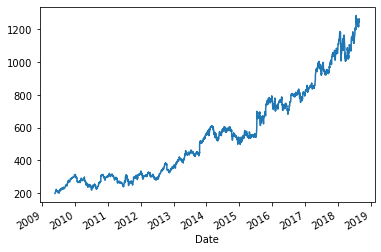

In [128]:
google["Adj Close"].plot()

## Groupby and Aggregate

#### 举个例子，假设我们现在有某个班学生的考试分数

In [129]:
scores = pd.DataFrame({
    "Name":["Jack","Mark","Kevin","Mark","Kevin","Jack","Jack","Kevin"],
    "Year":[2017,2017,2017,2017,2017,2018,2018,2018],
    "Midtem":[95,80,77,85,72,90,100,80],
    "Final":[90,85,82,90,77,90,85,90]
})
scores

,Name,Year,Midtem,Final
0,Jack,2017,95,90
1,Mark,2017,80,85
2,Kevin,2017,77,82
3,Mark,2017,85,90
4,Kevin,2017,72,77
5,Jack,2018,90,90
6,Jack,2018,100,85
7,Kevin,2018,80,90


In [130]:
group_by_name = scores.groupby("Name")
group_by_name

#### groupby构造了一个groupby object

### groupby之后一般要做一些aggregate操作

In [131]:
group_by_name.mean()

,Year,Midtem,Final
Name,,,
Jack,2017.666667,95.000000,88.333333
Kevin,2017.333333,76.333333,83.000000
Mark,2017.000000,82.500000,87.500000


#### 默认会排序，也可以选择不排序

In [132]:
scores.groupby("Name", sort=False).mean()

,Year,Midtem,Final
Name,,,
Jack,2017.666667,95.000000,88.333333
Mark,2017.000000,82.500000,87.500000
Kevin,2017.333333,76.333333,83.000000


In [133]:
group_by_name.aggregate("mean")

,Year,Midtem,Final
Name,,,
Jack,2017.666667,95.000000,88.333333
Kevin,2017.333333,76.333333,83.000000
Mark,2017.000000,82.500000,87.500000


In [134]:
group_by_name.aggregate("sum")

,Year,Midtem,Final
Name,,,
Jack,6053,285,265
Kevin,6052,229,249
Mark,4034,165,175


#### groupby的attributes

In [135]:
group_by_name.groups

{'Jack': Int64Index([0, 5, 6], dtype='int64'),
 'Kevin': Int64Index([2, 4, 7], dtype='int64'),
 'Mark': Int64Index([1, 3], dtype='int64')}

In [136]:
len(group_by_name)

3

#### 可以用多个columns做groupby

In [137]:
group_by_name_year = scores.groupby(["Name","Year"])
len(group_by_name_year)

5

In [138]:
group_by_name_year.aggregate("mean")

Midtem  Final
Name  Year               
Jack  2017    95.0   90.0
      2018    95.0   87.5
Kevin 2017    74.5   79.5
      2018    80.0   90.0
Mark  2017    82.5   87.5

#### 除了mean之外，我们还可以尝试size，sum，median

In [139]:
group_by_name_year.sum()

Midtem  Final
Name  Year               
Jack  2017      95     90
      2018     190    175
Kevin 2017     149    159
      2018      80     90
Mark  2017     165    175

In [140]:
group_by_name_year.size()
# 就是看每组几个数据

Name   Year
Jack   2017    1
       2018    2
Kevin  2017    2
       2018    1
Mark   2017    2
dtype: int64

In [141]:
group_by_name_year.median()

Midtem  Final
Name  Year               
Jack  2017    95.0   90.0
      2018    95.0   87.5
Kevin 2017    74.5   79.5
      2018    80.0   90.0
Mark  2017    82.5   87.5

In [142]:
group_by_name_year.describe()
# 显示各种数据

Midtem                                                  Final  \
            count  mean       std   min    25%   50%    75%    max count   
Name  Year                                                                 
Jack  2017    1.0  95.0       NaN  95.0  95.00  95.0  95.00   95.0   1.0   
      2018    2.0  95.0  7.071068  90.0  92.50  95.0  97.50  100.0   2.0   
Kevin 2017    2.0  74.5  3.535534  72.0  73.25  74.5  75.75   77.0   2.0   
      2018    1.0  80.0       NaN  80.0  80.00  80.0  80.00   80.0   1.0   
Mark  2017    2.0  82.5  3.535534  80.0  81.25  82.5  83.75   85.0   2.0   

                                                            
            mean       std   min    25%   50%    75%   max  
Name  Year                                                  
Jack  2017  90.0       NaN  90.0  90.00  90.0  90.00  90.0  
      2018  87.5  3.535534  85.0  86.25  87.5  88.75  90.0  
Kevin 2017  79.5  3.535534  77.0  78.25  79.5  80.75  82.0  
      2018  90.0       NaN  90.0  90.00  90.0  90.00  90.0  
Mark  2017  87.5  3.535534  85.0  86.25  87.5  88.75  90.0

### iterate groupby object
- 可以看出groupby实际上是将原dataframe分成了几个dataframe

In [143]:
for name, group in group_by_name:
    print(name)
    print(group)
    print(type(group))
    print()

Jack
   Name  Year  Midtem  Final
0  Jack  2017      95     90
5  Jack  2018      90     90
6  Jack  2018     100     85
<class 'pandas.core.frame.DataFrame'>

Kevin
    Name  Year  Midtem  Final
2  Kevin  2017      77     82
4  Kevin  2017      72     77
7  Kevin  2018      80     90
<class 'pandas.core.frame.DataFrame'>

Mark
   Name  Year  Midtem  Final
1  Mark  2017      80     85
3  Mark  2017      85     90
<class 'pandas.core.frame.DataFrame'>



#### 选择一个group

In [144]:
group_by_name.get_group("Jack")

,Year,Midtem,Final
0,2017,95,90
5,2018,90,90
6,2018,100,85


#### agg是aggregate的alias，可以替代使用

In [145]:
group_by_name.agg(sum)

,Year,Midtem,Final
Name,,,
Jack,6053,285,265
Kevin,6052,229,249
Mark,4034,165,175


In [146]:
group_by_name.agg([np.sum,np.mean])
# 可以算多个统计量

Year              Midtem            Final           
        sum         mean    sum       mean   sum       mean
Name                                                       
Jack   6053  2017.666667    285  95.000000   265  88.333333
Kevin  6052  2017.333333    229  76.333333   249  83.000000
Mark   4034  2017.000000    165  82.500000   175  87.500000

#### 对每一列可以采用不同的aggregate

In [147]:
group_by_name.agg({"Midtem": np.mean, "Final": np.sum})
# 可以对不同数据算不同的统计量

,Midtem,Final
Name,,
Jack,95.000000,265
Kevin,76.333333,249
Mark,82.500000,175


In [148]:
group_by_name.agg({"Midtem": np.mean, "Final": np.sum, "Year": (lambda x: list(x)[0])})
# 可以直接用一个function

,Midtem,Final,Year
Name,,,
Jack,95.000000,265,2017
Kevin,76.333333,249,2017
Mark,82.500000,175,2017


### transform
- transform会把group中的每一个表都按照同样的规则转化

In [149]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [150]:
google.index.year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='Date', length=2335)

In [151]:
google.groupby(google.index.year).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009,247.176111,249.234299,245.290420,247.514611,247.514611,5.377432e+06
2010,268.424416,270.744832,265.659627,268.079627,268.079627,6.353398e+06
2011,284.870722,287.470307,282.086252,284.771855,284.771855,6.150235e+06
2012,321.716956,324.462722,318.796357,321.729969,321.729969,5.203490e+06
2013,442.252351,445.514820,439.295526,442.563933,442.563933,4.170577e+06
2014,568.959666,572.842033,563.359614,568.122366,568.122366,2.666395e+06
2015,620.044801,625.693572,613.958214,619.988213,619.988213,2.166805e+06
2016,763.651865,769.408809,756.962699,763.213214,763.213214,1.967469e+06
2017,939.454622,945.217330,933.217610,939.773070,939.773070,1.616624e+06


In [152]:
zscore = lambda x: (x-x.mean())/x.std()

In [153]:
google.groupby(google.index.year).transform(zscore)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,-1.450281,-1.489847,-1.460551,-1.509472,-1.509472,-0.934502
2009-05-26,-1.520558,-1.394594,-1.490331,-1.347221,-1.347221,0.396770
2009-05-27,-1.316291,-1.291691,-1.269812,-1.329293,-1.329293,0.329365
2009-05-28,-1.270931,-1.295291,-1.272790,-1.256982,-1.256982,-0.021747
2009-05-29,-1.219753,-1.211139,-1.182111,-1.154941,-1.154941,-0.041507
...,...,...,...,...,...,...
2018-08-23,1.290451,1.372609,1.405441,1.293295,1.293295,-0.870729
2018-08-24,1.376833,1.404783,1.433912,1.512013,1.512013,-0.882656
2018-08-27,1.632874,1.700123,1.698812,1.785869,1.785869,-0.650525


#### 另一个function apply有同样效果，也更加通用，它可以被用作一个reducer，transformer或者filter function，取决于你如何定义转化function

In [154]:
google.groupby(google.index.year).apply(zscore)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,-1.450281,-1.489847,-1.460551,-1.509472,-1.509472,-0.934502
2009-05-26,-1.520558,-1.394594,-1.490331,-1.347221,-1.347221,0.396770
2009-05-27,-1.316291,-1.291691,-1.269812,-1.329293,-1.329293,0.329365
2009-05-28,-1.270931,-1.295291,-1.272790,-1.256982,-1.256982,-0.021747
2009-05-29,-1.219753,-1.211139,-1.182111,-1.154941,-1.154941,-0.041507
...,...,...,...,...,...,...
2018-08-23,1.290451,1.372609,1.405441,1.293295,1.293295,-0.870729
2018-08-24,1.376833,1.404783,1.433912,1.512013,1.512013,-0.882656
2018-08-27,1.632874,1.700123,1.698812,1.785869,1.785869,-0.650525


In [155]:
google.groupby(google.index.year).transform(lambda x: x.max()-x.min())
# 如果这种每一个数据都是一样的，transform仍然会全部显示出来

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,116.516510,113.783798,115.105103,114.799790,114.799790,15950500.0
2009-05-26,116.516510,113.783798,115.105103,114.799790,114.799790,15950500.0
2009-05-27,116.516510,113.783798,115.105103,114.799790,114.799790,15950500.0
2009-05-28,116.516510,113.783798,115.105103,114.799790,114.799790,15950500.0
2009-05-29,116.516510,113.783798,115.105103,114.799790,114.799790,15950500.0
...,...,...,...,...,...,...
2018-08-23,290.890015,266.449951,279.000000,280.320007,280.320007,5588600.0
2018-08-24,290.890015,266.449951,279.000000,280.320007,280.320007,5588600.0
2018-08-27,290.890015,266.449951,279.000000,280.320007,280.320007,5588600.0


In [156]:
google.groupby(google.index.year).apply(lambda x: x.max()-x.min())
# 而apply就会自动将其缩减

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009,116.516510,113.783798,115.105103,114.799790,114.799790,15950500.0
2010,95.940934,94.379394,95.400406,95.445450,95.445450,27642900.0
2011,84.459442,83.088089,84.584579,85.595612,85.595612,25458800.0
2012,105.290314,105.035034,104.349334,104.604614,104.604614,23179800.0
2013,208.048035,208.038025,208.918946,209.129120,209.129120,21642700.0
2014,114.154053,105.985047,112.719910,112.535675,112.535675,10383700.0
2015,294.720032,298.410003,296.290008,296.900024,296.900024,12337500.0
2016,156.010010,155.669983,156.380005,154.599975,154.599975,6426400.0
2017,282.400025,275.049988,275.380005,277.319946,277.319946,5206700.0


#### 我们尝试把数据画出来

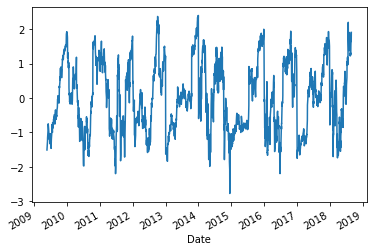

In [157]:
transformed = google.groupby(google.index.year).apply(zscore)
transformed["Adj Close"].plot()

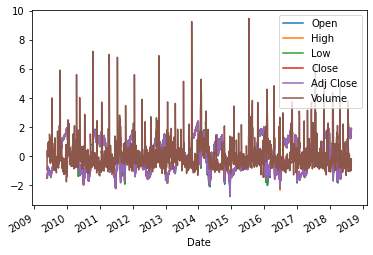

In [158]:
transformed.plot()

### filter
- 比如我们想要找出符合统计特征的一些内容，就像SQL里面的having，where语句

In [159]:
s = pd.Series([1,1,2,2,2,3,4,4,5])
s.groupby(s).filter(lambda x:x.sum()>4)
#1+1<4 3<4 那么这两个group被filter掉

2    2
3    2
4    2
6    4
7    4
8    5
dtype: int64

In [160]:
df = pd.DataFrame({"A": np.arange(8), "B": list("aaabbbcc")})
df

,A,B
0,0,a
1,1,a
2,2,a
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [161]:
df.groupby("B").filter(lambda x: len(x)>2)

,A,B
0,0,a
1,1,a
2,2,a
3,3,b
4,4,b
5,5,b


#### 我们来看看刚刚股票的价格均值超过1000的有哪些月份

In [162]:
 google.groupby([google.index.year, google.index.month]).mean()

Open         High          Low        Close    Adj Close  \
Date Date                                                                    
2009 5      201.705707   204.640640   200.412411   203.308310   203.308310   
     6      211.989262   213.865001   209.792977   212.104378   212.104378   
     7      213.382473   215.870418   211.281963   213.859542   213.859542   
     8      229.139377   230.649935   227.470087   229.189189   229.189189   
     9      240.254302   242.469852   238.380522   240.575575   240.575575   
...                ...          ...          ...          ...          ...   
2018 4     1042.681429  1054.315232  1028.276672  1039.951910  1039.951910   
     5     1070.547727  1082.155906  1063.676825  1074.852717  1074.852717   
     6     1148.376192  1158.890474  1138.985229  1149.319987  1149.319987   
     7     1197.510486  1211.672846  1187.250959  1201.263811  1201.263811   
     8     1240.279529  1249.467140  1231.654297  1240.419050  1240.419050   

                 Volume  
Date Date                
2009 5     5.264440e+06  
     6     6.399095e+06  
     7     6.631236e+06  
     8     4.637086e+06  
     9     4.859824e+06  
...                 ...  
2018 4     2.345067e+06  
     5     1.681241e+06  
     6     1.912890e+06  
     7     1.989652e+06  
     8     1.460224e+06  

[112 rows x 6 columns]

In [163]:
 google.groupby([google.index.year, google.index.month]).filter(
     lambda x: x["Adj Close"].mean()>1000)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-01,1036.319946,1047.859985,1034.000000,1042.599976,1042.599976,2163100
2017-11-02,1039.989990,1045.520020,1028.660034,1042.969971,1042.969971,1334700
2017-11-03,1042.750000,1050.660034,1037.650024,1049.989990,1049.989990,1388500
2017-11-06,1049.099976,1052.589966,1042.000000,1042.680054,1042.680054,914700
2017-11-07,1049.650024,1053.410034,1043.000000,1052.390015,1052.390015,1305200
...,...,...,...,...,...,...
2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000


### 小结：
#### groupby: split-apply-combine
- 第一步，分离数据，按照一定规则把数据分为几个group
- 第二步，分别操作，对每一个group都做一定的操作，可以是aggregate，transform，filter等
- 第三步，合并表格，将分成的几个group重新合并为dataframe

## 表格匹配与拼接
- concat
- append
- merge
- join

In [164]:
df1 = pd.DataFrame({"apts": [55000, 60000],
                   "cars": [200000, 300000]},
                  index = ["Shanghai", "Beijing"])
df1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000


In [165]:
df2 = pd.DataFrame({"cars": [150000, 120000],
                    "apts": [25000, 20000]},
                  index = ["Hangzhou", "Nanjing"])
df2

,cars,apts
Hangzhou,150000,25000
Nanjing,120000,20000


In [166]:
df3 = pd.DataFrame({"apts": [30000, 10000],
                   "cars": [180000, 100000]},
                  index = ["Guangzhou", "Chongqing"])
df3

,apts,cars
Guangzhou,30000,180000
Chongqing,10000,100000


### concatenate
- 默认按照列匹配，行拼接

In [167]:
frames = [df1, df2, df3]
result = pd.concat(frames, sort=False)
result

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Nanjing,20000,120000
Guangzhou,30000,180000
Chongqing,10000,100000


#### 可以指定keys，这样可以给每个部分加上一个key，这样就会有hierarchical index（等级制index）

In [168]:
result2 = pd.concat(frames, keys=["x","y","z"], sort=False)
result2

apts    cars
x Shanghai   55000  200000
  Beijing    60000  300000
y Hangzhou   25000  150000
  Nanjing    20000  120000
z Guangzhou  30000  180000
  Chongqing  10000  100000

In [169]:
result2.loc["x"]

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000


####  也可以做行匹配，列拼接

In [170]:
df4 = pd.DataFrame({"salaries": [10000, 30000, 30000, 20000, 15000]},
                  index = ["Suzhou","Beijing","Shanghai","Guangzhou","Tianjin"])
df4

,salaries
Suzhou,10000
Beijing,30000
Shanghai,30000
Guangzhou,20000
Tianjin,15000


In [171]:
result

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Nanjing,20000,120000
Guangzhou,30000,180000
Chongqing,10000,100000


In [172]:
result3 = pd.concat([result, df4], axis=1, sort=False)
result3

,apts,cars,salaries
Shanghai,55000.0,200000.0,30000.0
Beijing,60000.0,300000.0,30000.0
Hangzhou,25000.0,150000.0,NaN
Nanjing,20000.0,120000.0,NaN
Guangzhou,30000.0,180000.0,20000.0
Chongqing,10000.0,100000.0,NaN
Suzhou,NaN,NaN,10000.0
Tianjin,NaN,NaN,15000.0


#### 可以用inner去掉有NaN的行

In [173]:
result4 = pd.concat([result, df4], axis=1, sort=False, join="inner")
result4

,apts,cars,salaries
Shanghai,55000,200000,30000
Beijing,60000,300000,30000
Guangzhou,30000,180000,20000


In [174]:
pd.concat([result, df4], axis=1, sort=False, join="outer")

,apts,cars,salaries
Shanghai,55000.0,200000.0,30000.0
Beijing,60000.0,300000.0,30000.0
Hangzhou,25000.0,150000.0,NaN
Nanjing,20000.0,120000.0,NaN
Guangzhou,30000.0,180000.0,20000.0
Chongqing,10000.0,100000.0,NaN
Suzhou,NaN,NaN,10000.0
Tianjin,NaN,NaN,15000.0


### 用append来做concatenation
- 只能做行拼接，没有axis参数

In [175]:
df1.append(df2, sort=False)

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Nanjing,20000,120000


In [176]:
df1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000


In [177]:
df1.append(df4, sort=False)

,apts,cars,salaries
Shanghai,55000.0,200000.0,NaN
Beijing,60000.0,300000.0,NaN
Suzhou,NaN,NaN,10000.0
Beijing,NaN,NaN,30000.0
Shanghai,NaN,NaN,30000.0
Guangzhou,NaN,NaN,20000.0
Tianjin,NaN,NaN,15000.0


#### Series和DataFrame可以一起concatenate，这时候Series会被先转换成dataframe然后做join，Series视为只有一维的dataframe

In [178]:
s1 = pd.Series([60, 50], index=["Shanghai","Beijing"], name="meal")
s1

Shanghai    60
Beijing     50
Name: meal, dtype: int64

In [179]:
pd.concat([df1, s1], sort=False, axis=1)

,apts,cars,meal
Shanghai,55000,200000,60
Beijing,60000,300000,50


#### 如何append一个row到dataframe里

In [180]:
s2 = pd.Series([38000, 180000], index=["apts","cars"], name="Xiamen")
s2

apts     38000
cars    180000
Name: Xiamen, dtype: int64

In [181]:
df1.append(s2)

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Xiamen,38000,180000


### merge(join)

In [182]:
df1 = pd.DataFrame({"apts": [55000, 60000, 58000],
                   "cars": [200000, 300000, 250000],
                   "city": ["Shanghai", "Beijing", "Shenzhen"]})
df1

,apts,cars,city
0,55000,200000,Shanghai
1,60000,300000,Beijing
2,58000,250000,Shenzhen


In [183]:
df4 = pd.DataFrame({"salaries": [10000, 30000, 30000, 20000, 15000],
                    "city": ["Suzhou","Beijing","Shanghai","Guangzhou","Tianjin"]})
df4

,salaries,city
0,10000,Suzhou
1,30000,Beijing
2,30000,Shanghai
3,20000,Guangzhou
4,15000,Tianjin


In [184]:
pd.concat([df1, df4], sort=False, axis=1)

,apts,cars,city,salaries,city
0,55000.0,200000.0,Shanghai,10000,Suzhou
1,60000.0,300000.0,Beijing,30000,Beijing
2,58000.0,250000.0,Shenzhen,30000,Shanghai
3,NaN,NaN,NaN,20000,Guangzhou
4,NaN,NaN,NaN,15000,Tianjin


#### 这样用concat拼接或者append拼接无意义，可以用merge拼接

In [185]:
result = pd.merge(df1, df4, on="city")
result

,apts,cars,city,salaries
0,55000,200000,Shanghai,30000
1,60000,300000,Beijing,30000


In [186]:
result = pd.merge(df1, df4)
result
# on的参数在一定程度上可以自动识别

,apts,cars,city,salaries
0,55000,200000,Shanghai,30000
1,60000,300000,Beijing,30000


In [187]:
result = pd.merge(df1, df4, on="city", how="outer")
result
# 留下NaN行

,apts,cars,city,salaries
0,55000.0,200000.0,Shanghai,30000.0
1,60000.0,300000.0,Beijing,30000.0
2,58000.0,250000.0,Shenzhen,NaN
3,NaN,NaN,Suzhou,10000.0
4,NaN,NaN,Guangzhou,20000.0
5,NaN,NaN,Tianjin,15000.0


In [188]:
result = pd.merge(df1, df4, on="city", how="left")
result
# 以左表为主

,apts,cars,city,salaries
0,55000,200000,Shanghai,30000.0
1,60000,300000,Beijing,30000.0
2,58000,250000,Shenzhen,NaN


In [189]:
result = pd.merge(df1, df4, on="city", how="right")
result
# 以右表为主

,apts,cars,city,salaries
0,55000.0,200000.0,Shanghai,30000
1,60000.0,300000.0,Beijing,30000
2,NaN,NaN,Suzhou,10000
3,NaN,NaN,Guangzhou,20000
4,NaN,NaN,Tianjin,15000


#### 其实用concat也可以做同样的事情

In [190]:
df1.set_index("city")

,apts,cars
city,,
Shanghai,55000,200000
Beijing,60000,300000
Shenzhen,58000,250000


In [191]:
pd.concat([df1.set_index("city"), df4.set_index("city")], sort=False)

,apts,cars,salaries
city,,,
Shanghai,55000.0,200000.0,NaN
Beijing,60000.0,300000.0,NaN
Shenzhen,58000.0,250000.0,NaN
Suzhou,NaN,NaN,10000.0
Beijing,NaN,NaN,30000.0
Shanghai,NaN,NaN,30000.0
Guangzhou,NaN,NaN,20000.0
Tianjin,NaN,NaN,15000.0


#### join on index

In [192]:
df1 = pd.DataFrame({"apts": [55000, 60000, 58000],
                   "cars": [200000, 300000, 250000]},
                   index=["Shanghai", "Beijing", "Shenzhen"])
df1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Shenzhen,58000,250000


In [193]:
df4 = pd.DataFrame({"salaries": [10000, 30000, 30000, 20000, 15000]},
                  index = ["Suzhou","Beijing","Shanghai","Guangzhou","Tianjin"])
df4

,salaries
Suzhou,10000
Beijing,30000
Shanghai,30000
Guangzhou,20000
Tianjin,15000


In [194]:
df1.join(df4)
# 默认：列拼接，以左边为主

,apts,cars,salaries
Shanghai,55000,200000,30000.0
Beijing,60000,300000,30000.0
Shenzhen,58000,250000,NaN


In [195]:
#pd.merge(df1, df4)
# 无法自动找到相同的column就会报错

In [196]:
pd.merge(df1, df4, left_index=True, right_index=True, how="outer")
# 新增了参数，以左边dataframe的index作为匹配为true，以右边...

,apts,cars,salaries
Beijing,60000.0,300000.0,30000.0
Guangzhou,NaN,NaN,20000.0
Shanghai,55000.0,200000.0,30000.0
Shenzhen,58000.0,250000.0,NaN
Suzhou,NaN,NaN,10000.0
Tianjin,NaN,NaN,15000.0


## 项目：movie ratings
- 表格的汇总与拼接

#### 下面是电影评分表

In [197]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [198]:
ratings.shape

(100004, 4)

In [199]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


#### 我们来计算一下每部电影的平均分，以及有多少人打分
#### 自己先尝试：

In [200]:
ratings_movieId = ratings.groupby("movieId", sort=False)
ratings_movieId.agg({"rating": np.mean, "userId": lambda x: len(list(set(x)))})

,rating,userId
movieId,,
31,3.178571,42
1029,3.702381,42
1061,3.545455,33
1129,3.312500,48
1172,4.260870,46
...,...,...
64997,2.500000,1
72380,3.500000,1
129,3.000000,1


#### 最后正确，理解有偏差，同一人打分多次也算多人次打分，下面课程答案：

In [201]:
ratings_movieId = ratings.groupby("movieId", sort=False)
ratings_mean = ratings_movieId.agg({"rating": np.mean, "timestamp": "count"}).rename(
    columns={"timestamp": "number"})
ratings_mean

,rating,number
movieId,,
31,3.178571,42
1029,3.702381,42
1061,3.545455,33
1129,3.312500,48
1172,4.260870,46
...,...,...
64997,2.500000,1
72380,3.500000,1
129,3.000000,1


#### 下面是电影名称表

In [202]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### 排除不要的列的信息，只留下需要信息

In [203]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [204]:
movies = movies[["movieId", "title"]]
movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9121,163056,Shin Godzilla (2016)
9122,163949,The Beatles: Eight Days a Week - The Touring Y...
9123,164977,The Gay Desperado (1936)
9124,164979,"Women of '69, Unboxed"


#### 再将其与前面表格merge一下，就可以直观看出电影的评价和评价人数

In [205]:
#pd.merge(ratings_mean, movies, left_index=True, right_on="movieId",how="inner", sort=True)

#### 报错原因是因为数据里面有脏数据，即你不能把int64型数据和object型数据进行merge，下面我们处理脏数据

In [206]:
ratings_mean.index.dtype

dtype('int64')

In [207]:
movies["movieId"].dtype #类型为objects 取首字母

dtype('O')

In [208]:
#pd.to_numeric(movies["movieId"])

#### 用numetic处理再次报错，在9125位置有一个str出现

In [209]:
movies[movies["movieId"]=="2020-03-13"]

,movieId,title
9125,2020-03-13,NaN


#### 具体情况具体处理

In [210]:
movies.shape[0]

9126

In [211]:
for i in range(movies.shape[0]):
    try:
        int(movies.loc[i,"movieId"])
    except ValueError:
        movies.loc[i,"movieId"] = 99999999

In [212]:
movies["movieId"].dtype

dtype('O')

In [213]:
movies["movieId"] = pd.to_numeric(movies["movieId"])

In [214]:
movies["movieId"].dtype

dtype('int64')

In [215]:
movie_list = pd.merge(ratings_mean, movies, left_index=True, right_on="movieId", how="inner", sort=True)
movie_list

,rating,number,movieId,title
0,3.872470,247,1,Toy Story (1995)
1,3.401869,107,2,Jumanji (1995)
2,3.161017,59,3,Grumpier Old Men (1995)
3,2.384615,13,4,Waiting to Exhale (1995)
4,3.267857,56,5,Father of the Bride Part II (1995)
...,...,...,...,...
9117,5.000000,1,161944,The Last Brickmaker in America (2001)
9118,4.500000,1,162376,Stranger Things
9119,5.000000,1,162542,Rustom (2016)
9120,3.000000,1,162672,Mohenjo Daro (2016)


#### 如果要找出最popular的movie ,使用pandas的sort_values函数

In [216]:
movie_list.sort_values(by=["number","rating"], ascending=False)

,rating,number,movieId,title
321,4.054252,341,356,Forrest Gump (1994)
266,4.256173,324,296,Pulp Fiction (1994)
284,4.487138,311,318,"Shawshank Redemption, The (1994)"
525,4.138158,304,593,"Silence of the Lambs, The (1991)"
232,4.221649,291,260,Star Wars: Episode IV - A New Hope (1977)
...,...,...,...,...
8797,0.500000,1,125916,Fifty Shades of Grey (2015)
8834,0.500000,1,129250,Superfast! (2015)
9067,0.500000,1,152057,Miles Ahead (2016)
9098,0.500000,1,159972,Approaching the Unknown (2016)


## 项目：bikes lanes
- 处理脏数据，groupby来得到需要的数据

#### 处理实际数据的时候，很多时间都花在处理脏数据上
#### 我们来尝试一个例子如下
#### Montreal城市自行车路线数据，分别记录了每条每天有多少人经过

In [217]:
#bikes = pd.read_csv("bikeslanes.csv")

#### 报错原因：默认编码utf-8，解码也是，但这个文件是用latin-1编码的

In [218]:
bikes = pd.read_csv("bikeslanes.csv", encoding="latin-1")
bikes

,;Date;Unnamed: 1;Berri1;Boyer;Brébeuf;CSC (Côte Sainte-Catherine);Maisonneuve_1;Maisonneuve_2;Maisonneuve_3;Notre-Dame;Parc;Parc U-Zelt Test;PierDup;Pont_Jacques_Cartier;Rachel / Hôtel de Ville;Rachel / Papineau;René-Lévesque;Saint-Antoine;Saint-Laurent U-Zelt Test;Saint-Urbain;Totem_Laurier;University;Viger
0,0;01/01/2015;00:00;58;12;4;17;33.0;49;21;16;16...
1,1;02/01/2015;00:00;75;7;5;15;30.0;113;27;9;32;...
2,2;03/01/2015;00:00;79;7;3;7;30.0;107;36;12;18;...
3,3;04/01/2015;00:00;10;1;21;0;10.0;35;29;1;0;;0...
4,4;05/01/2015;00:00;42;0;2;0;27.0;90;21;1;1;;6;...
...,...
314,314;11/11/2015;00:00;3044;1931;2828;1393;;3603...
315,315;12/11/2015;00:00;1751;930;1670;888;;2048;7...
316,316;13/11/2015;00:00;1818;906;1711;873;;2115;6...
317,317;14/11/2015;00:00;979;759;978;322;;1112;290...


#### 发现表头不对，是因为文件的分隔符是分号，不是默认的逗号

In [219]:
bikes = pd.read_csv("bikeslanes.csv", encoding="latin-1", sep=";")
bikes

,Unnamed: 0,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,0,01/01/2015,00:00,58,12,4,17,33.0,49,21,...,NaN,58,91,24,3,NaN,17,78,21,6
1,1,02/01/2015,00:00,75,7,5,15,30.0,113,27,...,NaN,109,177,32,13,NaN,11,57,77,4
2,2,03/01/2015,00:00,79,7,3,7,30.0,107,36,...,NaN,71,131,33,5,NaN,14,174,40,5
3,3,04/01/2015,00:00,10,1,21,0,10.0,35,29,...,NaN,6,11,6,1,NaN,1,20,6,0
4,4,05/01/2015,00:00,42,0,2,0,27.0,90,21,...,NaN,0,5,49,20,NaN,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,314,11/11/2015,00:00,3044,1931,2828,1393,NaN,3603,1754,...,950.0,2328,3280,1210,338,4065.0,1534,1527,2860,356
315,315,12/11/2015,00:00,1751,930,1670,888,NaN,2048,700,...,467.0,1345,1877,755,180,2336.0,960,955,1777,198
316,316,13/11/2015,00:00,1818,906,1711,873,NaN,2115,634,...,482.0,1416,1980,719,204,2628.0,978,1040,1727,258
317,317,14/11/2015,00:00,979,759,978,322,NaN,1112,290,...,266.0,1061,1448,269,70,1876.0,640,805,737,73


#### 再处理一下index和data的数据形式

In [220]:
bikes = pd.read_csv("bikeslanes.csv", encoding="latin-1", sep=";",
                   index_col="Date", parse_dates=["Date"])
bikes

,Unnamed: 0,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
2015-02-01,1,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2015-03-01,2,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
2015-04-01,3,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
2015-05-01,4,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-11,314,00:00,3044,1931,2828,1393,NaN,3603,1754,1142,...,950.0,2328,3280,1210,338,4065.0,1534,1527,2860,356
2015-12-11,315,00:00,1751,930,1670,888,NaN,2048,700,675,...,467.0,1345,1877,755,180,2336.0,960,955,1777,198
2015-11-13,316,00:00,1818,906,1711,873,NaN,2115,634,477,...,482.0,1416,1980,719,204,2628.0,978,1040,1727,258


#### 发现日期变成了年日月，我们需要的是年月日

In [221]:
bikes = pd.read_csv("bikeslanes.csv", encoding="latin-1", sep=";",
                   index_col="Date", parse_dates=["Date"], dayfirst=True)
bikes

,Unnamed: 0,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
2015-01-02,1,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2015-01-03,2,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
2015-01-04,3,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
2015-01-05,4,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-11,314,00:00,3044,1931,2828,1393,NaN,3603,1754,1142,...,950.0,2328,3280,1210,338,4065.0,1534,1527,2860,356
2015-11-12,315,00:00,1751,930,1670,888,NaN,2048,700,675,...,467.0,1345,1877,755,180,2336.0,960,955,1777,198
2015-11-13,316,00:00,1818,906,1711,873,NaN,2115,634,477,...,482.0,1416,1980,719,204,2628.0,978,1040,1727,258


In [222]:
bikes.shape

(319, 23)

#### 数据里有很多NaN，我们用dropna来删掉一些行和列

In [223]:
bikes.dropna()
# 默认是一行中有一个NaN就删掉该行，显然这不是我们想要的

,Unnamed: 0,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,,,


In [224]:
bikes.dropna(axis=1, how="all")
# 删除列，如果全是NaN才删掉

,Unnamed: 0,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
2015-01-02,1,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2015-01-03,2,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
2015-01-04,3,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
2015-01-05,4,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-11,314,00:00,3044,1931,2828,1393,NaN,3603,1754,1142,...,950.0,2328,3280,1210,338,4065.0,1534,1527,2860,356
2015-11-12,315,00:00,1751,930,1670,888,NaN,2048,700,675,...,467.0,1345,1877,755,180,2336.0,960,955,1777,198
2015-11-13,316,00:00,1818,906,1711,873,NaN,2115,634,477,...,482.0,1416,1980,719,204,2628.0,978,1040,1727,258


#### 当然对于有很多NaN的列可以用fillna来填补数据

In [225]:
bikes.fillna(0)

,Unnamed: 0,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,00:00,58,12,4,17,33.0,49,21,16,...,0.0,58,91,24,3,0.0,17,78,21,6
2015-01-02,1,00:00,75,7,5,15,30.0,113,27,9,...,0.0,109,177,32,13,0.0,11,57,77,4
2015-01-03,2,00:00,79,7,3,7,30.0,107,36,12,...,0.0,71,131,33,5,0.0,14,174,40,5
2015-01-04,3,00:00,10,1,21,0,10.0,35,29,1,...,0.0,6,11,6,1,0.0,1,20,6,0
2015-01-05,4,00:00,42,0,2,0,27.0,90,21,1,...,0.0,0,5,49,20,0.0,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-11,314,00:00,3044,1931,2828,1393,0.0,3603,1754,1142,...,950.0,2328,3280,1210,338,4065.0,1534,1527,2860,356
2015-11-12,315,00:00,1751,930,1670,888,0.0,2048,700,675,...,467.0,1345,1877,755,180,2336.0,960,955,1777,198
2015-11-13,316,00:00,1818,906,1711,873,0.0,2115,634,477,...,482.0,1416,1980,719,204,2628.0,978,1040,1727,258


In [226]:
bikes

,Unnamed: 0,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
2015-01-02,1,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2015-01-03,2,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
2015-01-04,3,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
2015-01-05,4,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-11,314,00:00,3044,1931,2828,1393,NaN,3603,1754,1142,...,950.0,2328,3280,1210,338,4065.0,1534,1527,2860,356
2015-11-12,315,00:00,1751,930,1670,888,NaN,2048,700,675,...,467.0,1345,1877,755,180,2336.0,960,955,1777,198
2015-11-13,316,00:00,1818,906,1711,873,NaN,2115,634,477,...,482.0,1416,1980,719,204,2628.0,978,1040,1727,258


In [227]:
bikes.mean() # 列平均

Unnamed: 0                      159.000000
Berri1                         2915.398119
Boyer                          2212.909091
Brébeuf                        2859.485893
CSC (Côte Sainte-Catherine)    1167.388715
Maisonneuve_1                    89.935484
Maisonneuve_2                  2208.031348
Maisonneuve_3                  1011.175549
Notre-Dame                     1137.316614
Parc                           1754.257053
Parc U-Zelt Test               2090.250000
PierDup                        1130.708464
Pont_Jacques_Cartier           2164.578947
Rachel / Hôtel de Ville        2207.626959
Rachel / Papineau              2939.294671
René-Lévesque                  1477.206897
Saint-Antoine                   207.476489
Saint-Laurent U-Zelt Test      4563.180000
Saint-Urbain                   1387.119122
Totem_Laurier                  1903.363636
University                     2023.708464
Viger                           295.347962
dtype: float64

In [228]:
bikes.mean(axis=1) # 行平均

Date
2015-01-01      27.947368
2015-01-02      42.368421
2015-01-03      40.842105
2015-01-04       8.473684
2015-01-05      19.736842
                 ...     
2015-11-11    1964.476190
2015-11-12    1166.190476
2015-11-13    1126.047619
2015-11-14     648.333333
2015-11-15     662.666667
Length: 319, dtype: float64

In [231]:
bikes = bikes.T.fillna(bikes.mean(axis=1)).T
bikes

,Unnamed: 0,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,00:00,58,12,4,17,33,49,21,16,...,27.9474,58,91,24,3,27.9474,17,78,21,6
2015-01-02,1,00:00,75,7,5,15,30,113,27,9,...,42.3684,109,177,32,13,42.3684,11,57,77,4
2015-01-03,2,00:00,79,7,3,7,30,107,36,12,...,40.8421,71,131,33,5,40.8421,14,174,40,5
2015-01-04,3,00:00,10,1,21,0,10,35,29,1,...,8.47368,6,11,6,1,8.47368,1,20,6,0
2015-01-05,4,00:00,42,0,2,0,27,90,21,1,...,19.7368,0,5,49,20,19.7368,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-11,314,00:00,3044,1931,2828,1393,1964.48,3603,1754,1142,...,950,2328,3280,1210,338,4065,1534,1527,2860,356
2015-11-12,315,00:00,1751,930,1670,888,1166.19,2048,700,675,...,467,1345,1877,755,180,2336,960,955,1777,198
2015-11-13,316,00:00,1818,906,1711,873,1126.05,2115,634,477,...,482,1416,1980,719,204,2628,978,1040,1727,258


#### 最后我们再来求平均，看看一周中每天有多少自行车通过

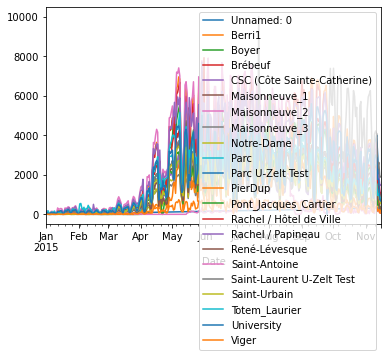

In [232]:
bikes.plot()

In [233]:
bikes.index.weekday

Int64Index([3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=319)

In [236]:
#bikes.groupby(bikes.index.weekday).mean()
# 我发现出现了课程中没有的错误，发现明显列问题，先删去b

DataError: No numeric types to aggregate

In [260]:
bikes.drop(["Unnamed: 1"], axis=1, inplace=True)

In [274]:
bikes = bikes.transform(pd.to_numeric)

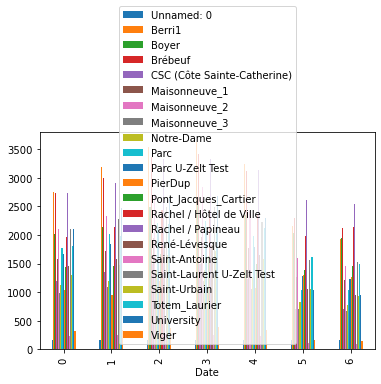

In [276]:
bikes.groupby(bikes.index.weekday).mean().plot(kind="bar")
# 拿到每周每日流量均值的柱状图

## 股票分析项目
- 表格拼接和处理

In [277]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


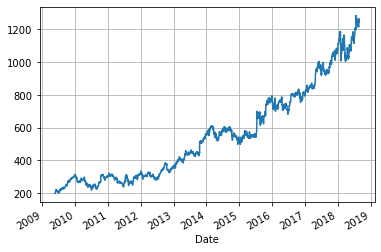

In [278]:
google["Adj Close"].plot(grid=True)

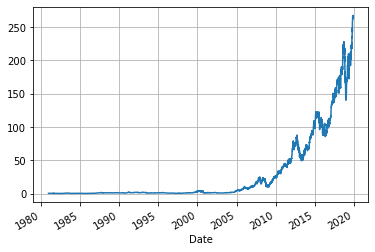

In [283]:
aapl = pd.read_csv("AAPL.csv", index_col=[0], parse_dates=[0])
aapl["Adj Close"].plot(grid=True)

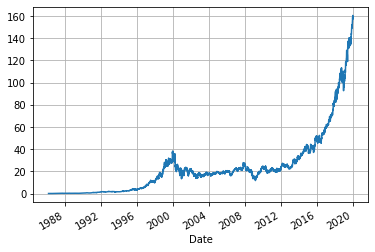

In [284]:
msft = pd.read_csv("MSFT.csv", index_col=0, parse_dates=[0])
msft["Adj Close"].plot(grid=True)

#### 尝试把三个表格连接在一起

In [290]:
stocks = pd.concat([google["Adj Close"], aapl["Adj Close"], msft["Adj Close"]],
                  axis=1)
stocks.columns=["GOOG","AAPL","MSFT"]
stocks

,GOOG,AAPL,MSFT
Date,,,
1980-12-12,NaN,0.407747,NaN
1980-12-15,NaN,0.386473,NaN
1980-12-16,NaN,0.358108,NaN
1980-12-17,NaN,0.366972,NaN
1980-12-18,NaN,0.377609,NaN
...,...,...,...
2019-12-31,NaN,NaN,157.699997
2020-01-02,NaN,NaN,160.619995
2020-01-03,NaN,NaN,158.619995


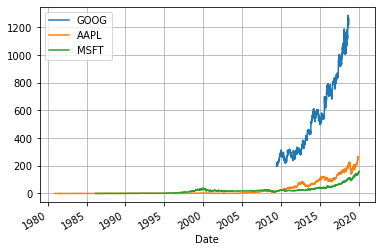

In [291]:
stocks.plot(grid=True)

#### 显然前面一截数据没有对比效果，我们舍去

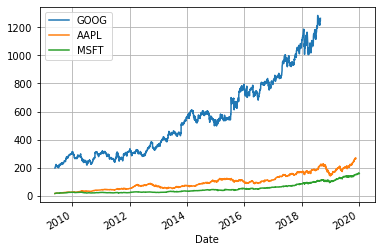

In [292]:
valid_stocks = stocks[stocks.index >= stocks["GOOG"].first_valid_index()]
valid_stocks.plot(grid=True)
# .first_valid_index()表示第一个不为NaN的值的index

#### pandas支持很多关于时间序列的操作，比如我们将其从日K线图变为月K线图

In [299]:
monthly_stocks = valid_stocks.resample("M").last()
monthly_stocks

,GOOG,AAPL,MSFT
Date,,,
2009-05-31,208.823822,16.881203,16.278612
2009-06-30,211.006012,17.704067,18.522860
2009-07-31,221.746750,20.309401,18.328056
2009-08-31,231.066071,20.908531,19.316618
2009-09-30,248.173172,23.039032,20.155104
...,...,...,...
2019-09-30,NaN,223.299591,138.558517
2019-10-31,NaN,248.015381,142.883804
2019-11-30,NaN,266.369995,151.380005


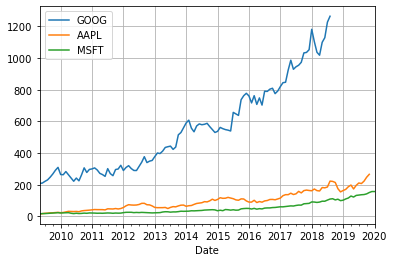

In [300]:
monthly_stocks.plot(grid=True)